# Pairs Trading Strategies

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
GLDdf = pd.read_csv('data/GLD_history.csv', skiprows=1)
GLDdf.columns = ['Date', 'Close', 'Volume', 'Open', 'High', 'Low']
GLDdf['Date'] = pd.to_datetime(GLDdf['Date'], errors='coerce')
GLDdf['Close'] = pd.to_numeric(GLDdf['Close'], errors='coerce')

USOdf = pd.read_csv('data/USO_history.csv', skiprows=1)
USOdf.columns = ['Date', 'Close', 'Volume', 'Open', 'High', 'Low']
USOdf['Date'] = pd.to_datetime(USOdf['Date'], errors='coerce')
USOdf['Close'] = pd.to_numeric(USOdf['Close'], errors='coerce')

## Price Spread Strategy

C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\2680095403.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  GLDdf['Close_Lagged'] = GLDdf['Close'].shift(1).fillna(method="bfill")
C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\2680095403.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  USOdf['Close_Lagged'] = USOdf['Close'].shift(1).fillna(method="bfill")
C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\2680095403.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio.append(model.params[1])
C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\2680095403.py:10: FutureWarning: Series.__getitem__ treating keys 

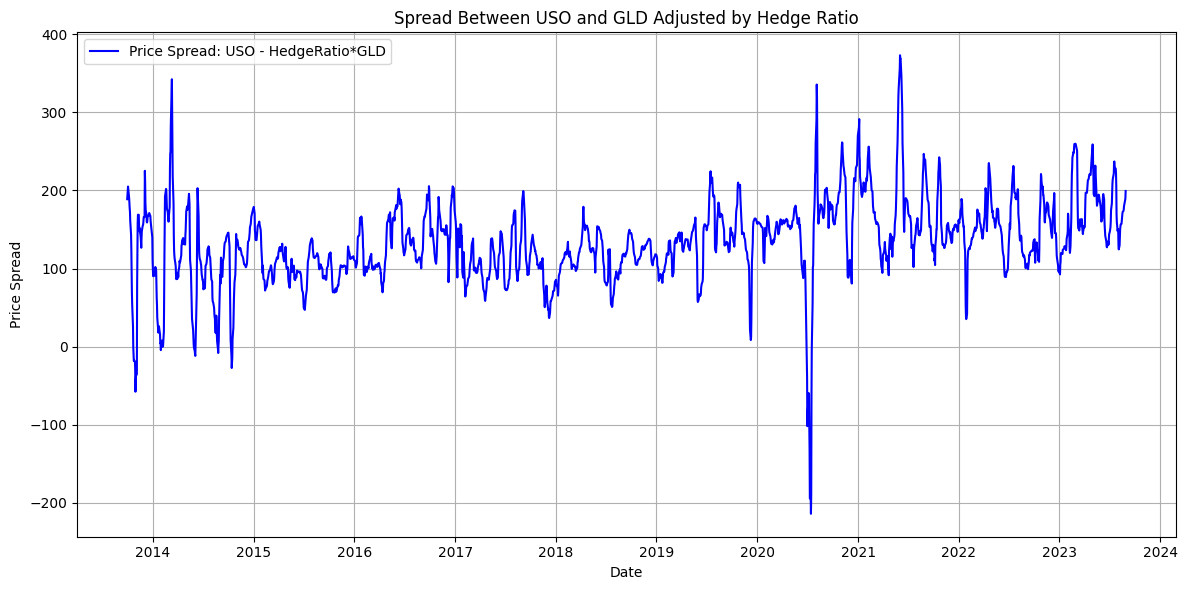

In [3]:
import statsmodels.api as sm

# Hedge Ratio
window = 20
GLDdf['Close_Lagged'] = GLDdf['Close'].shift(1).fillna(method="bfill")
USOdf['Close_Lagged'] = USOdf['Close'].shift(1).fillna(method="bfill")
hedge_ratio = []
for i in range(len(GLDdf) - window + 1):
    model = sm.OLS(GLDdf['Close'].iloc[i:i+window], sm.add_constant(USOdf['Close'].iloc[i:i+window])).fit()
    hedge_ratio.append(model.params[1])
GLDdf['Hedge_Ratio'] = [np.nan] * (window - 1) + hedge_ratio

# Price Spread
GLDdf['Price_Spread'] = GLDdf['Close'] - GLDdf['Hedge_Ratio'] * USOdf['Close']

# Plot Spread
plt.figure(figsize=(12,6))
plt.plot(GLDdf['Date'], GLDdf['Price_Spread'], label='Price Spread: USO - HedgeRatio*GLD', color='blue')
plt.title('Spread Between USO and GLD Adjusted by Hedge Ratio')
plt.xlabel('Date')
plt.ylabel('Price Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Z-Score
mean = GLDdf['Price_Spread'].rolling(window=window).mean()
std = GLDdf['Price_Spread'].rolling(window=window).std()
GLDdf['Z_Score'] = (GLDdf['Price_Spread'] - mean) / std

# Position
GLDdf['Position'] = -GLDdf['Z_Score']

## Price Spread Strategy Returns

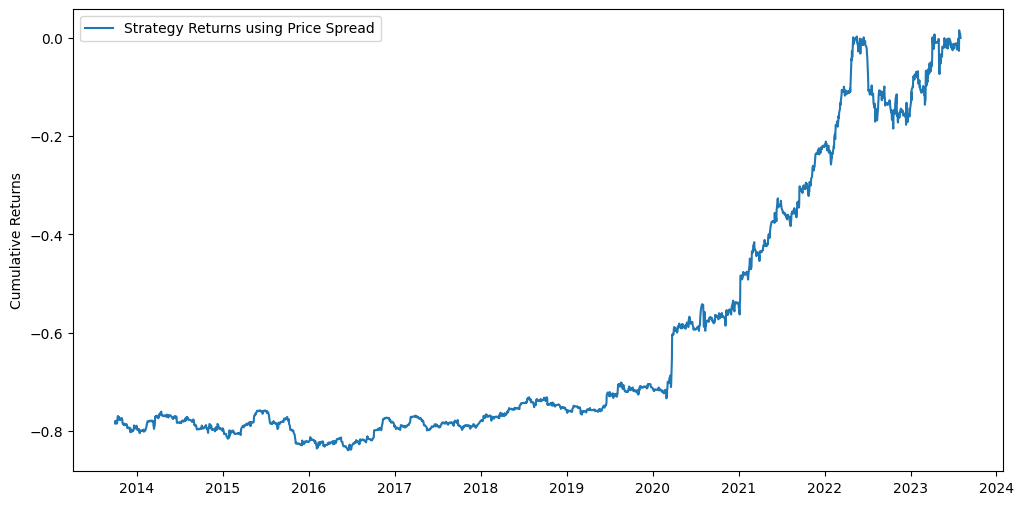

In [4]:
# Strategy Return
GLDdf['Return_PriceSpread'] = GLDdf['Close'].pct_change()
GLDdf['StrategyReturn'] = GLDdf['Return_PriceSpread'] * GLDdf['Position']
GLDdf['CumulativeStrategyReturns'] = (1 + GLDdf['StrategyReturn']).cumprod() - 1

# Plot Cumulative Returns
plt.figure(figsize=(12,6))
plt.plot(GLDdf['Date'], GLDdf['CumulativeStrategyReturns'], label='Strategy Returns using Price Spread')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

## Log Price Spread Strategy

C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\1198397712.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  GLDdf['Close_Lagged'] = GLDdf['Log_Close'].shift(1).fillna(method="bfill")
C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\1198397712.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  USOdf['Close_Lagged'] = USOdf['Log_Close'].shift(1).fillna(method="bfill")
C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\1198397712.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_hedge_ratio.append(log_model.params[1])
C:\Users\Arjun\AppData\Local\Temp\ipykernel_37500\1198397712.py:11: FutureWarning: Series.__getitem_

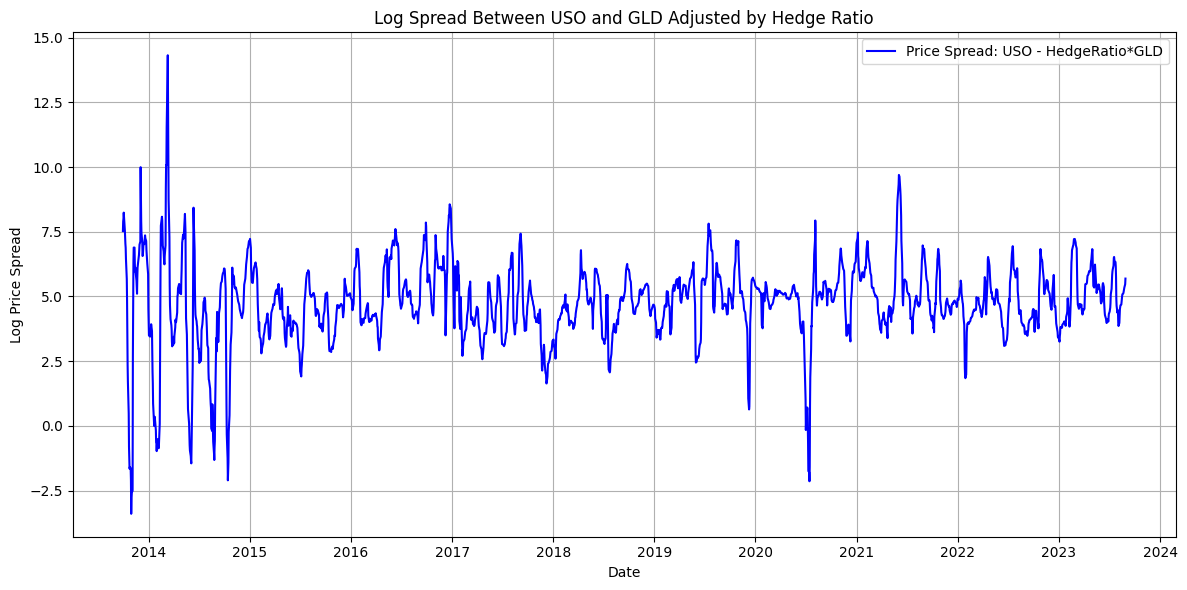

In [5]:
GLDdf['Log_Close'] = np.log(GLDdf['Close'])
USOdf['Log_Close'] = np.log(USOdf['Close'])

# Hedge Ratio
window = 20
GLDdf['Close_Lagged'] = GLDdf['Log_Close'].shift(1).fillna(method="bfill")
USOdf['Close_Lagged'] = USOdf['Log_Close'].shift(1).fillna(method="bfill")
log_hedge_ratio = []
for i in range(len(GLDdf) - window + 1):
    log_model = sm.OLS(GLDdf['Log_Close'].iloc[i:i+window], sm.add_constant(USOdf['Log_Close'].iloc[i:i+window])).fit()
    log_hedge_ratio.append(log_model.params[1])
GLDdf['Hedge_Ratio'] = [np.nan] * (window - 1) + log_hedge_ratio

# Price Spread
GLDdf['Log_Price_Spread'] = GLDdf['Log_Close'] - GLDdf['Hedge_Ratio'] * USOdf['Log_Close']

# Plot Spread
plt.figure(figsize=(12,6))
plt.plot(GLDdf['Date'], GLDdf['Log_Price_Spread'], label='Price Spread: USO - HedgeRatio*GLD', color='blue')
plt.title('Log Spread Between USO and GLD Adjusted by Hedge Ratio')
plt.xlabel('Date')
plt.ylabel('Log Price Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Z-Score
log_mean = GLDdf['Log_Price_Spread'].rolling(window=window).mean()
log_std = GLDdf['Log_Price_Spread'].rolling(window=window).std()
GLDdf['Log_Z_Score'] = (GLDdf['Log_Price_Spread'] - log_mean) / log_std

# Position based on Z-Score
GLDdf['Log_Position'] = -GLDdf['Log_Z_Score']

## Log Price Spread Strategy Returns

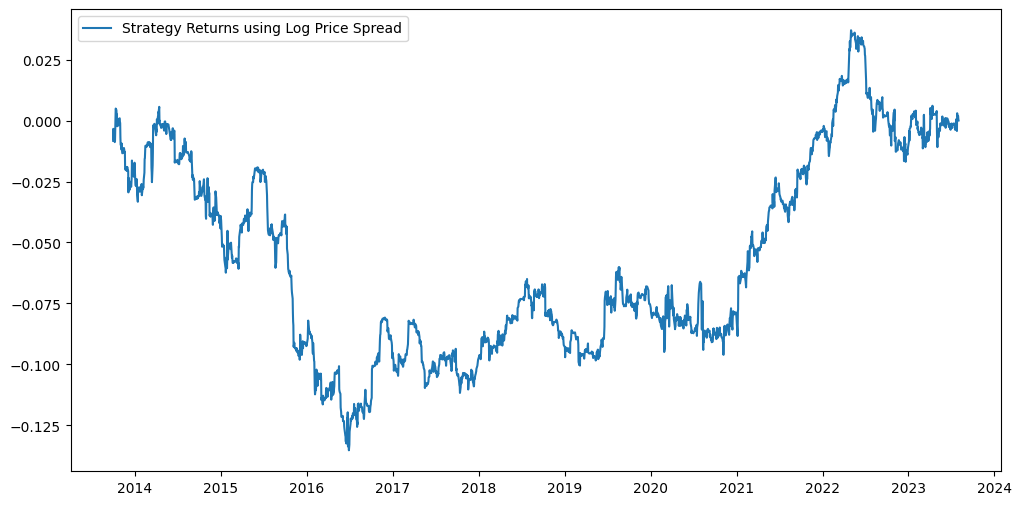

In [6]:
# Strategy Return
GLDdf['Return_LogPriceSpread'] = GLDdf['Log_Close'].pct_change()
GLDdf['LogStrategyReturn'] = GLDdf['Return_LogPriceSpread'] * GLDdf['Log_Position']
GLDdf['LogCumulativeStrategyReturns'] = (1 + GLDdf['LogStrategyReturn']).cumprod() - 1

# Plot Cumulative Returns
plt.figure(figsize=(12,6))
plt.plot(GLDdf['Date'], GLDdf['LogCumulativeStrategyReturns'], label='Strategy Returns using Log Price Spread')
plt.legend()
plt.show()

## Ratio Strategy

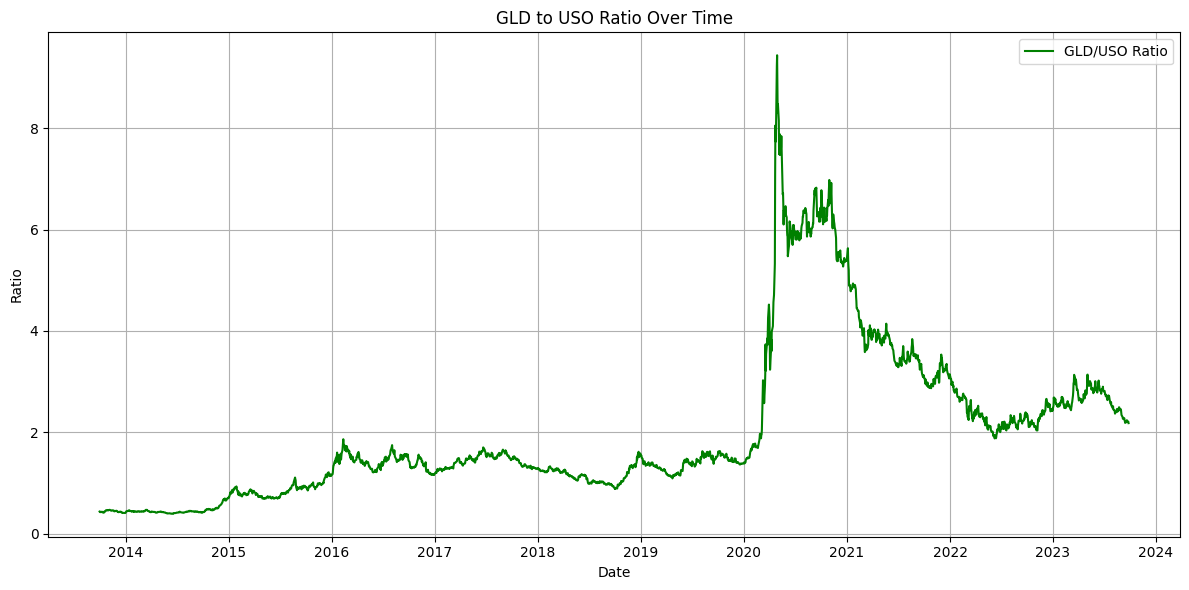

In [7]:
# Ratio GLD/USO
GLDdf['Ratio'] = GLDdf['Close'] / USOdf['Close']

plt.figure(figsize=(12,6))
plt.plot(GLDdf['Date'], GLDdf['Ratio'], label='GLD/USO Ratio', color='green')
plt.title('GLD to USO Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Z-Score 
ratio_mean = GLDdf['Ratio'].rolling(window=window).mean()
ratio_std = GLDdf['Ratio'].rolling(window=window).std()
GLDdf['Z_Score_Ratio'] = (GLDdf['Ratio'] - ratio_mean) / ratio_std

# Position 
GLDdf['Position_Ratio'] = -GLDdf['Z_Score_Ratio']

## Ratio Strategy Returns

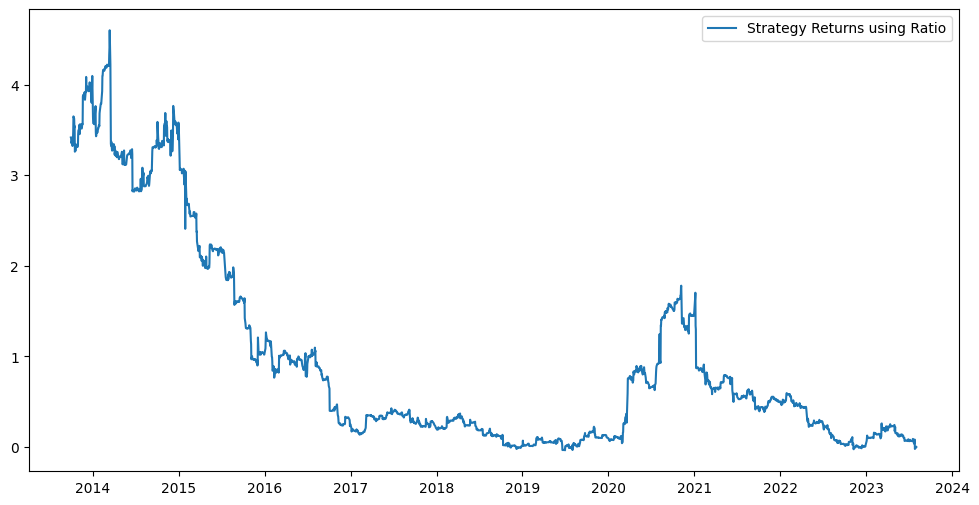

In [8]:
# Strategy Return
GLDdf['StrategyReturn_Ratio'] = GLDdf['StrategyReturn'] * GLDdf['Position_Ratio']
GLDdf['CumulativeStrategyReturns_Ratio'] = (1 + GLDdf['StrategyReturn_Ratio']).cumprod() - 1

# Plot Cumulative Returns
plt.figure(figsize=(12,6))
plt.plot(GLDdf['Date'], GLDdf['CumulativeStrategyReturns_Ratio'], label='Strategy Returns using Ratio')
plt.legend()
plt.show()

## Strategy Statistics

In [9]:
def compute_metrics(returns, risk_free_rate_annual):
    risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1
    
    # Sharpe Ratio
    average_daily_return = returns.mean()
    std_dev_return = returns.std()
    sharpe_ratio = (average_daily_return - risk_free_rate_daily) / std_dev_return
    
    # APR
    apr = (1 + average_daily_return) ** 252 - 1
    
    return sharpe_ratio, apr

risk_free_rate_annual = 0.053  # 3 month t bill rate

# Price Spread
sharpe_price_spread, apr_price_spread = compute_metrics(GLDdf['StrategyReturn'], risk_free_rate_annual)

# Log Price Spread
sharpe_log_price_spread, apr_log_price_spread = compute_metrics(GLDdf['LogStrategyReturn'], risk_free_rate_annual)

# Ratio
sharpe_ratio, apr_ratio = compute_metrics(GLDdf['StrategyReturn_Ratio'], risk_free_rate_annual)

print(f"Sharpe Ratio (Price Spread): {sharpe_price_spread}")
print(f"APR (Price Spread): {apr_price_spread * 100:.2f}%")

print(f"\nSharpe Ratio (Log Price Spread): {sharpe_log_price_spread}")
print(f"APR (Log Price Spread): {apr_log_price_spread * 100:.2f}%")

print(f"\nSharpe Ratio (Ratio): {sharpe_ratio}")
print(f"APR (Ratio): {apr_ratio * 100:.2f}%")


Sharpe Ratio (Price Spread): -0.05881210222549229
APR (Price Spread): -12.70%

Sharpe Ratio (Log Price Spread): -0.0816724140346991
APR (Log Price Spread): -0.01%

Sharpe Ratio (Ratio): 0.029829519895361846
APR (Ratio): 21.96%
